# Introduction

As a global civilization, we are awakening to the realization of just how much happiness in our day-to-day lives really matters. The positive effects of a happy mind not only propagate throughout the various dimensions of a person's life, but they furthermore ripple throughout society in a stone-in-the-pond fashion. Corporations, governments and organizations are becoming increasingly aware that its employees, citizens and members are better able to contribute to their respective tasks when minimum happiness levels are met, and that it is therefore in their best interests to contribute to the well-beings of these people. As a result, happiness metrics are becoming increasingly utilized in making policy decisions - a win for everyone.

In 2012 the first iteration of the World Happiness Report was produced, a survey that looks at nationally representative happiness levels across countries as a measure of national progress. It was an impressive feat that required the contributions of leading experts in fields such as statistics, data science, economics, health, psychology and public policy, among many others. To evaluate happiness levels, the report used surveys provided by the Gallup World Poll, the gold standard of worldwide polling. More specifically, happiness scores are based on the Cantril Ladder, a subjective metric that asks each participant to evaluate his or her quality of life on a scale from 0 to 10, with 10 being the dream life. The poll furthermore includes geographical data and data for six characteristics that are hypothesized to be correlated with national happiness levels; it is these features and how they relate to happiness that will be the main focus of this project.

**THE CHARACTERISTICS**

Higher values of a characteristic corresponding to countries that are more favorable in those characteristics.



*   GDP per capita
*   Social support
*   Healthy life expectancy
*   Freedom to make life choices
*   Generosity
*   Perceptions of corruption 










# Importing Libraries


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
import plotly.graph_objs as go
import tensorflow as tf

from sklearn.preprocessing import StandardScaler 
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation, DBSCAN
from sklearn.mixture import GaussianMixture 

# Importing Dataset

In [ ]:
WHR = pd.read_csv('Happiness2020.csv')

# Data Exploratory

Printing dataset

In [ ]:
WHR.head()

,Country name,Regional indicator,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,Western Europe,7.8087,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445
1,Denmark,Western Europe,7.6456,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489
2,Switzerland,Western Europe,7.5599,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728
3,Iceland,Western Europe,7.5045,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710
4,Norway,Western Europe,7.4880,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218


In [ ]:
WHR.shape

(153, 9)

The dataset shows that it has 153 entries with 9 features.

In [ ]:
WHR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country name                  153 non-null    object 
 1   Regional indicator            153 non-null    object 
 2   Ladder score                  153 non-null    float64
 3   Logged GDP per capita         153 non-null    float64
 4   Social support                153 non-null    float64
 5   Healthy life expectancy       153 non-null    float64
 6   Freedom to make life choices  153 non-null    float64
 7   Generosity                    153 non-null    float64
 8   Perceptions of corruption     153 non-null    float64
dtypes: float64(7), object(2)
memory usage: 10.9+ KB


In [ ]:
WHR.isnull().sum()

Country name                    0
Regional indicator              0
Ladder score                    0
Logged GDP per capita           0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

No null entry is there in the data.

In [ ]:
WHR.describe()

,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,153.00000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000
mean,5.47324,9.295706,0.808721,64.445529,0.783360,-0.014568,0.733120
std,1.11227,1.201588,0.121453,7.057848,0.117786,0.151809,0.175172
min,2.56690,6.492642,0.319460,45.200001,0.396573,-0.300907,0.109784
25%,4.72410,8.350645,0.737217,58.961712,0.714839,-0.127015,0.683019
50%,5.51500,9.456313,0.829204,66.305145,0.799805,-0.033665,0.783122
75%,6.22850,10.265124,0.906747,69.289192,0.877709,0.085429,0.849151
max,7.80870,11.450681,0.974670,76.804581,0.974998,0.560664,0.935585


In [ ]:
WHR.sort_values(by="Ladder score", ascending=False).head(10)

,Country name,Regional indicator,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,Western Europe,7.8087,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445
1,Denmark,Western Europe,7.6456,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489
2,Switzerland,Western Europe,7.5599,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728
3,Iceland,Western Europe,7.5045,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710
4,Norway,Western Europe,7.4880,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218
5,Netherlands,Western Europe,7.4489,10.812712,0.939139,72.300919,0.908548,0.207612,0.364717
6,Sweden,Western Europe,7.3535,10.758794,0.926311,72.600769,0.939144,0.111615,0.250880
7,New Zealand,North America and ANZ,7.2996,10.500943,0.949119,73.202629,0.936217,0.191598,0.221139
8,Austria,Western Europe,7.2942,10.742824,0.928046,73.002502,0.899989,0.085429,0.499955
9,Luxembourg,Western Europe,7.2375,11.450681,0.906912,72.599998,0.905636,-0.004621,0.367084


Above are the countries with highest happiness score.

It shows that **Finland** has the highest happiness score with **7.8087**, followed by **Denamrk** with **7.6456** and so on.

In [ ]:
WHR.sort_values(by="Ladder score", ascending=True).head(10)

,Country name,Regional indicator,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
152,Afghanistan,South Asia,2.5669,7.462861,0.470367,52.590000,0.396573,-0.096429,0.933687
151,South Sudan,Sub-Saharan Africa,2.8166,7.425360,0.553707,51.000000,0.451314,0.016519,0.763417
150,Zimbabwe,Sub-Saharan Africa,3.2992,7.865712,0.763093,55.617260,0.711458,-0.072064,0.810237
149,Rwanda,Sub-Saharan Africa,3.3123,7.600104,0.540835,61.098846,0.900589,0.055484,0.183541
148,Central African Republic,Sub-Saharan Africa,3.4759,6.625160,0.319460,45.200001,0.640881,0.082410,0.891807
147,Tanzania,Sub-Saharan Africa,3.4762,7.967665,0.688933,57.496075,0.821540,0.109669,0.619799
146,Botswana,Sub-Saharan Africa,3.4789,9.711204,0.779122,58.924454,0.821328,-0.250394,0.777931
145,Yemen,Middle East and North Africa,3.5274,7.759683,0.817981,56.727283,0.599920,-0.157735,0.800288
144,Malawi,Sub-Saharan Africa,3.5380,7.062226,0.544007,57.592888,0.803223,0.021433,0.731701
143,India,South Asia,3.5733,8.849824,0.592201,60.215187,0.881445,0.057552,0.772043


Above are the countires with lowest happiness score.

**Afghanistan** has the lowest happiness score with **2.5669**, followed by **South Sudan** with **2.8166**.

In [ ]:
WHR_Region = WHR.groupby('Regional indicator')

In [ ]:
WHR_Region['Ladder score'].describe().sort_values(by="mean",ascending=False).head(10)

,count,mean,std,min,25%,50%,75%,max
Regional indicator,,,,,,,,
North America and ANZ,4.0,7.173525,0.159661,6.9396,7.152000,7.22745,7.248975,7.2996
Western Europe,21.0,6.899219,0.683212,5.5150,6.400900,7.09370,7.448900,7.8087
Latin America and Caribbean,21.0,5.981786,0.660213,3.7208,5.796800,6.13710,6.348300,7.1214
Central and Eastern Europe,17.0,5.883818,0.523486,4.8827,5.546100,6.00040,6.215500,6.9109
East Asia,6.0,5.714850,0.459451,5.1239,5.469750,5.69060,5.872000,6.4554
Southeast Asia,9.0,5.383367,0.656866,4.3080,4.888600,5.35350,5.998800,6.3771
Commonwealth of Independent States,12.0,5.358342,0.536527,4.5607,5.008525,5.54070,5.568650,6.2576
Middle East and North Africa,17.0,5.227159,0.988163,3.5274,4.633400,5.00510,6.102100,7.1286
South Asia,7.0,4.475443,1.083878,2.5669,3.950150,4.83280,5.167400,5.6933


The above table shows that **North Amercica and ANZ** has the highest happinness score with mean **7.173525** and **Sub-Saharan Africa** has the lowest score with mean **4.383495**.

In [ ]:
WHR_NAA = WHR[WHR['Regional indicator'] == 'North America and ANZ']
WHR_WE = WHR[WHR['Regional indicator'] == 'Western Europe']
WHR_LAC = WHR[WHR['Regional indicator'] == 'Latin America and Caribbean']
WHR_CEE = WHR[WHR['Regional indicator'] == 'Central and Eastern Europe']
WHR_EA = WHR[WHR['Regional indicator'] == 'East Asia']
WHR_SA = WHR[WHR['Regional indicator'] == 'Southeast Asia']
WHR_CIS = WHR[WHR['Regional indicator'] == 'Commonwealth of Independent States']
WHR_MENA = WHR[WHR['Regional indicator'] == 'Middle East and North Africa']
WHR_SA = WHR[WHR['Regional indicator'] == 'South Asia']
WHR_SSA = WHR[WHR['Regional indicator'] == 'Sub-Saharan Africa']

In [ ]:
len(WHR_SSA[WHR_SSA['Ladder score'] > 6])

1

Among **39** countires in **Sub-Saharan Africa**, there is only **1** country that have happinnes score above **6.0**

In [ ]:
len(WHR_SA[WHR_SA['Ladder score'] > 6])

0

Among **7** countires in **South Asia**, there are **0** countries that have happinnes score above **6.0**

In [ ]:
len(WHR_WE[WHR_WE['Ladder score'] > 6])

18

Among **21** countires in **Western Europe**, there are **18** countries that have happinnes score above **6.0**

In [ ]:
len(WHR_NAA[WHR_NAA['Ladder score'] > 6])

4

Among **4** countires in **North America and ANZ**, all the countries that have happinnes score above **6.0**

In [ ]:
Delta_NAA = WHR_NAA.max(axis=0)['Ladder score'] - WHR_NAA.min(axis=0)['Ladder score']
print(Delta_NAA)

0.3600001329999989


The difference between the maximum and the minimum value of happiness score of **North America and ANZ** is **0.3600001329999989**.

In [ ]:
Delta_WE = WHR_WE.max(axis=0)['Ladder score'] - WHR_WE.min(axis=0)['Ladder score']
print(Delta_WE)

2.2937002189999998


The difference between the maximum and the minimum value of happiness score of **Western Europe** is **2.2937002189999998**.

In [ ]:
Delta_SA = WHR_SA.max(axis=0)['Ladder score'] - WHR_SA.min(axis=0)['Ladder score']
print(Delta_SA)

3.1263997550000004


The difference between the maximum and the minimum value of happiness score of **South Asia** is **3.1263997550000004**.

In [ ]:
Delta_SSA = WHR_SSA.max(axis=0)['Ladder score'] - WHR_SSA.min(axis=0)['Ladder score']
print(Delta_SSA)

3.2846996789999996


The difference between the maximum and the minimum value of happiness score of **Sub-Saharan Africa** is **3.2846996789999996**

In [ ]:
WHR.describe()

,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,153.00000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000
mean,5.47324,9.295706,0.808721,64.445529,0.783360,-0.014568,0.733120
std,1.11227,1.201588,0.121453,7.057848,0.117786,0.151809,0.175172
min,2.56690,6.492642,0.319460,45.200001,0.396573,-0.300907,0.109784
25%,4.72410,8.350645,0.737217,58.961712,0.714839,-0.127015,0.683019
50%,5.51500,9.456313,0.829204,66.305145,0.799805,-0.033665,0.783122
75%,6.22850,10.265124,0.906747,69.289192,0.877709,0.085429,0.849151
max,7.80870,11.450681,0.974670,76.804581,0.974998,0.560664,0.935585


In [ ]:
X=WHR_Region['Ladder score']
X.describe()

,count,mean,std,min,25%,50%,75%,max
Regional indicator,,,,,,,,
Central and Eastern Europe,17.0,5.883818,0.523486,4.8827,5.546100,6.00040,6.215500,6.9109
Commonwealth of Independent States,12.0,5.358342,0.536527,4.5607,5.008525,5.54070,5.568650,6.2576
East Asia,6.0,5.714850,0.459451,5.1239,5.469750,5.69060,5.872000,6.4554
Latin America and Caribbean,21.0,5.981786,0.660213,3.7208,5.796800,6.13710,6.348300,7.1214
Middle East and North Africa,17.0,5.227159,0.988163,3.5274,4.633400,5.00510,6.102100,7.1286
North America and ANZ,4.0,7.173525,0.159661,6.9396,7.152000,7.22745,7.248975,7.2996
South Asia,7.0,4.475443,1.083878,2.5669,3.950150,4.83280,5.167400,5.6933
Southeast Asia,9.0,5.383367,0.656866,4.3080,4.888600,5.35350,5.998800,6.3771
Sub-Saharan Africa,39.0,4.383495,0.683051,2.8166,3.850850,4.43200,4.821700,6.1013


## Plotting histogram

### North America and ANZ

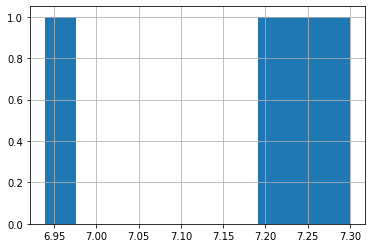

In [ ]:
WHR_NAA['Ladder score'].hist()


### Western Europe

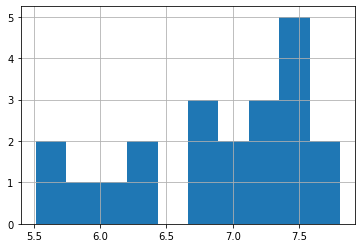

In [ ]:
WHR_WE['Ladder score'].hist() 


### Latin America and Caribbean

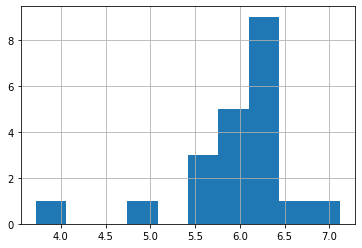

In [ ]:
WHR_LAC['Ladder score'].hist() 


### Central and Eastern Europe

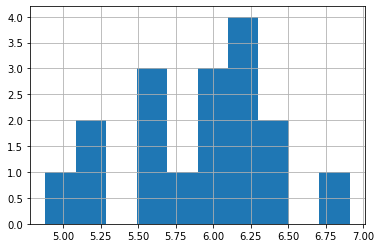

In [ ]:
WHR_CEE['Ladder score'].hist() 

### East Asia

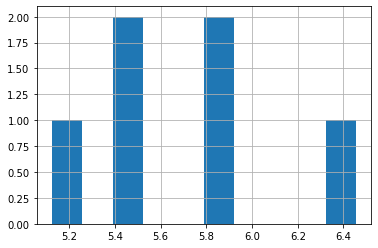

In [ ]:
WHR_EA['Ladder score'].hist() 


### Southeast Asia

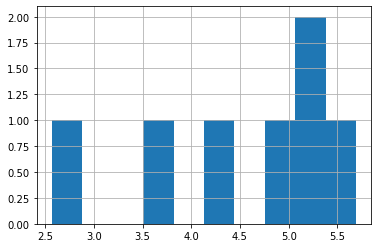

In [ ]:
WHR_SA['Ladder score'].hist() 


### Commonwealth of Independent States

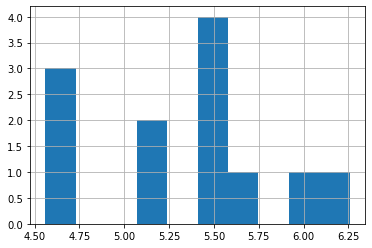

In [ ]:
WHR_CIS['Ladder score'].hist() 


### Middle East and North Africa

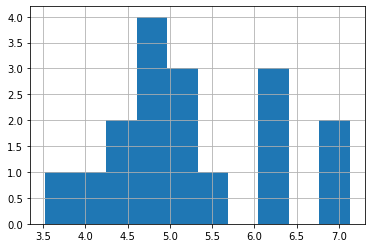

In [ ]:
WHR_MENA['Ladder score'].hist() 


### South Asia

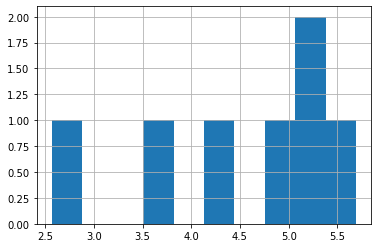

In [ ]:
WHR_SA['Ladder score'].hist() 


### Sub-Saharan Africa

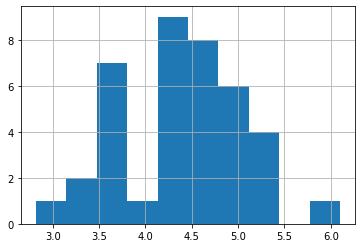

In [ ]:
WHR_SSA['Ladder score'].hist() 

## Individual effectness

### Logged GDP per capita

#### Hsitogram of Logged GDP per capita

In [ ]:
WHR['Logged GDP per capita'].hist()

#### Scatter plot of Happiness score(pairwise)

In [ ]:
sns.pairplot(data=WHR, kind='reg', height = 5,
                  x_vars=['Ladder score'],
                  y_vars= ['Social support',  'Logged GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption'])

In [ ]:
sns.pairplot(data=WHR, height = 5, hue='Regional indicator',
                  x_vars=['Ladder score'],
                  y_vars= ['Social support',  'Logged GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption'])

### Logged GDP per capita

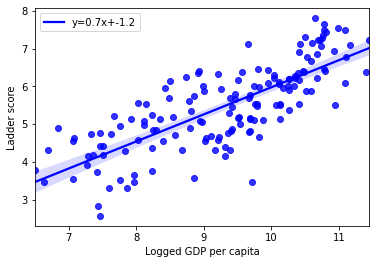

In [ ]:
# get coeffs of linear fit
slope, intercept, r_value, p_value, std_err = stats.linregress(WHR['Logged GDP per capita'],WHR['Ladder score'])

# use line_kws to set line label for legend
ax = sns.regplot(x="Logged GDP per capita", y="Ladder score", data=WHR, color='b', 
 line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})

# plot legend
ax.legend()

plt.show()

The **Logged GDP per capita** is proportional to the **Happinness Score**. The slope of the above graph is **0.7**, which implies that a unit increase in **Logged GDP per capita** increase **Happinness Score** by 0.7 units.  

### Social support

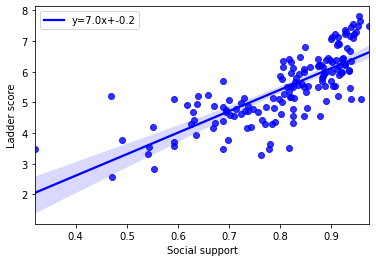

In [ ]:
# get coeffs of linear fit
slope, intercept, r_value, p_value, std_err = stats.linregress(WHR['Social support'],WHR['Ladder score'])

# use line_kws to set line label for legend
ax = sns.regplot(x="Social support", y="Ladder score", data=WHR, color='b', 
 line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})

# plot legend
ax.legend()

plt.show()

The **Social support** is proportional to the **Happinness Score**. The slope of the above graph is **7.0**, which implies that a unit increase in **Social support** increase **Happinness Score** by 7.0 units.  

### Healthy life expectancy

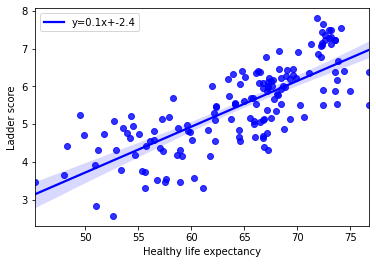

In [ ]:
# get coeffs of linear fit
slope, intercept, r_value, p_value, std_err = stats.linregress(WHR['Healthy life expectancy'],WHR['Ladder score'])

# use line_kws to set line label for legend
ax = sns.regplot(x="Healthy life expectancy", y="Ladder score", data=WHR, color='b', 
 line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})

# plot legend
ax.legend()

plt.show()

The **Healthy life expectancy** is proportional to the **Happinness Score**. The slope of the above graph is **0.1**, which implies that a unit increase in **Healthy life expectancy** increase **Happinness Score** by 0.1 units.  

### Freedom to make life choices

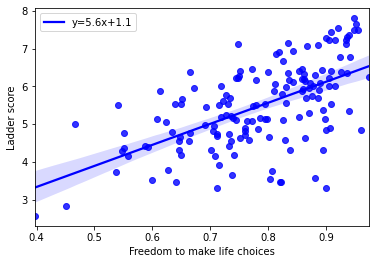

In [ ]:
# get coeffs of linear fit
slope, intercept, r_value, p_value, std_err = stats.linregress(WHR['Freedom to make life choices'],WHR['Ladder score'])

# use line_kws to set line label for legend
ax = sns.regplot(x="Freedom to make life choices", y="Ladder score", data=WHR, color='b', 
 line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})

# plot legend
ax.legend()

plt.show()

The **Freedom to make life choices** is proportional to the **Happinness Score**. The slope of the above graph is **5.6**, which implies that a unit increase in **Freedom to make life choices** increase **Happinness Score** by 5.6 units.  

### Generosity

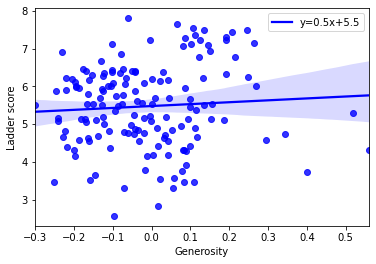

In [ ]:
# get coeffs of linear fit
slope, intercept, r_value, p_value, std_err = stats.linregress(WHR['Generosity'],WHR['Ladder score'])

# use line_kws to set line label for legend
ax = sns.regplot(x="Generosity", y="Ladder score", data=WHR, color='b', 
 line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})

# plot legend
ax.legend()

plt.show()

The **Generosity** is proportional to the **Happinness Score**. The slope of the above graph is **0.5**, which implies that a unit increase in **Generosity** increase **Happinness Score** by 0.5 units.  

### Perceptions of corruption

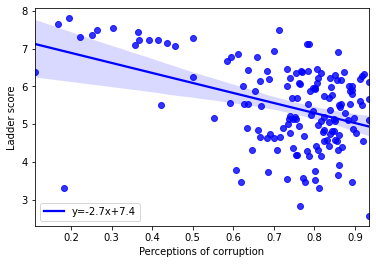

In [ ]:
# get coeffs of linear fit
slope, intercept, r_value, p_value, std_err = stats.linregress(WHR['Perceptions of corruption'],WHR['Ladder score'])

# use line_kws to set line label for legend
ax = sns.regplot(x="Perceptions of corruption", y="Ladder score", data=WHR, color='b', 
 line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})

# plot legend
ax.legend()

plt.show()

The **Perceptions of corruption** is inversely proportional to the **Happinness Score**. The slope of the above graph is **-2.7**, which implies that a unit increase in **Perceptions of corruption** decreases **Happinness Score** by -2.7 units.  

## Correlation

In [ ]:
WHR.corr(method="pearson", min_periods=20)

,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Ladder score,1.000000,0.775374,0.765001,0.770316,0.590597,0.069043,-0.418305
Logged GDP per capita,0.775374,1.000000,0.781814,0.848469,0.419019,-0.118399,-0.334729
Social support,0.765001,0.781814,1.000000,0.742744,0.478863,-0.056780,-0.210530
Healthy life expectancy,0.770316,0.848469,0.742744,1.000000,0.448846,-0.071852,-0.353841
Freedom to make life choices,0.590597,0.419019,0.478863,0.448846,1.000000,0.253721,-0.420145
Generosity,0.069043,-0.118399,-0.056780,-0.071852,0.253721,1.000000,-0.278480
Perceptions of corruption,-0.418305,-0.334729,-0.210530,-0.353841,-0.420145,-0.278480,1.000000


From the correlation matrix we can observe that **Logged GDP per capita, Social support, Healthy life expectancy** are strongly and positively correlated with the **Happiness Score**.

**Perceptions of corrpution** on the other hand is negatively correlated with ***Happiness Score***.

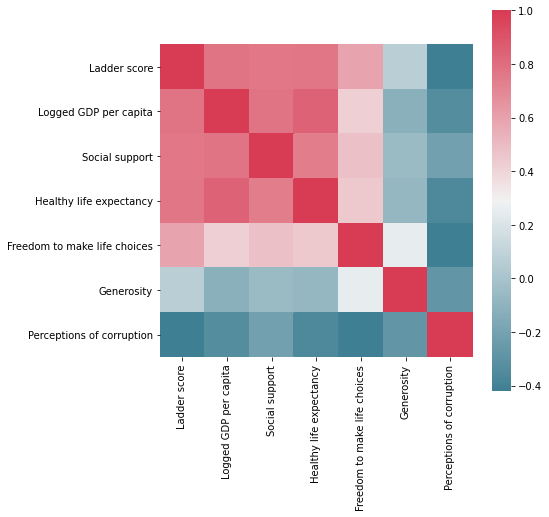

In [ ]:
corr = WHR.corr(method = "pearson")

f, ax = plt.subplots(figsize=(7, 7))

sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), 
            cmap=sns.diverging_palette(220, 7, as_cmap=True), square=True, ax=ax)

Similar observation can be concluded from the heat map.

Firstly we will draw vertical bar plots corresponding to each country to compare different factors contributing to happiness visually

In [ ]:
data=WHR.sort_values('Ladder score',ascending=True)

In [ ]:
def normalization(x):
  x = (x - x.min())/(x.max() - x.min())
  return x

In [ ]:
data['Logged GDP per capita'] = normalization(data['Logged GDP per capita'])
data['Social support'] = normalization(data['Social support'])
data['Healthy life expectancy'] = normalization(data['Healthy life expectancy'])
data['Freedom to make life choices'] = normalization(data['Freedom to make life choices'])
data['Generosity'] = normalization(data['Generosity'])
data['Perceptions of corruption'] = normalization(data['Perceptions of corruption'])

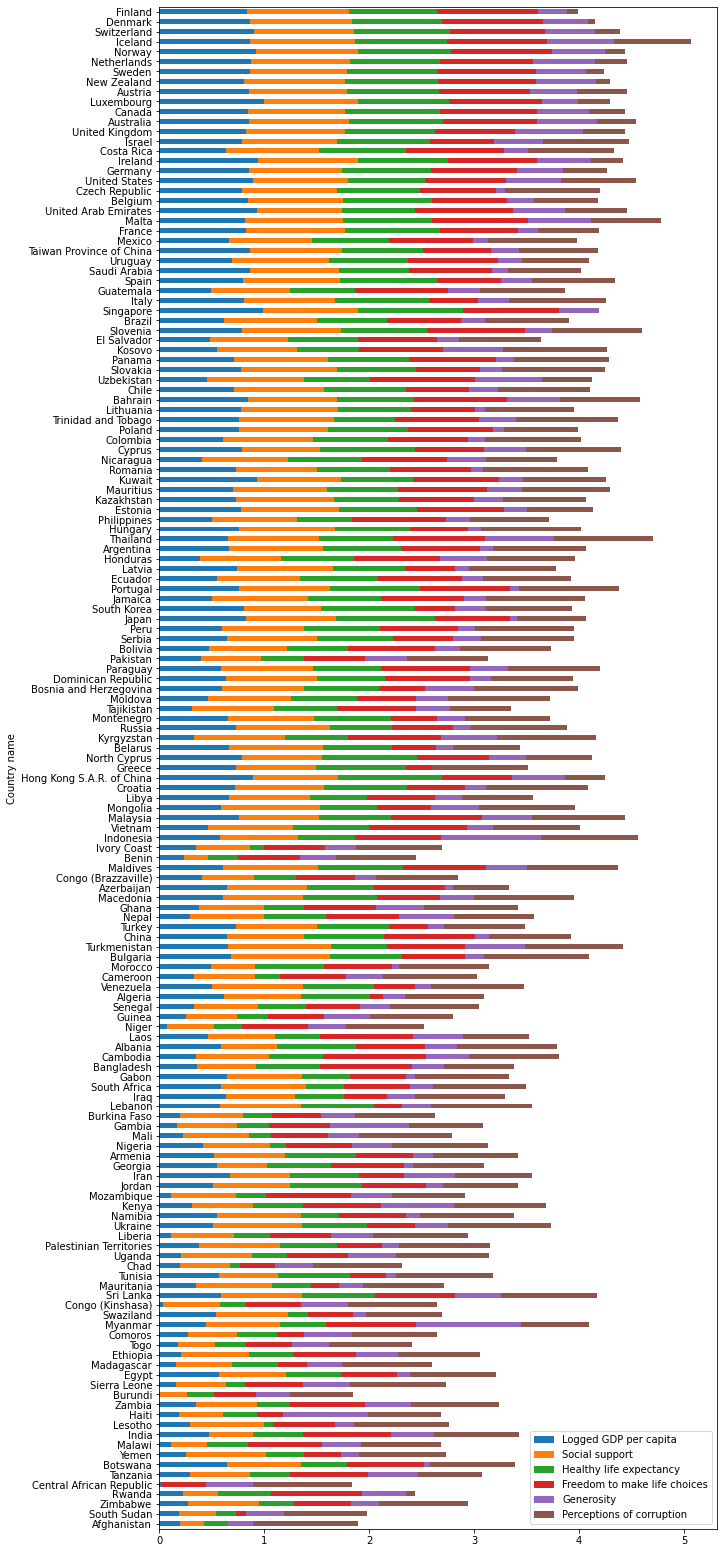

In [ ]:
df_wh=data.filter(['Country name', 'Logged GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption'])
df_wh=df_wh.set_index('Country name')
df_wh.plot.barh(stacked=True,  figsize=(10,28))

From the above plot countries with high **Happinnes Score** shows that there is a significant contribution by the factors of **Logged GDP per capita, Social Support, Health life expentacy and Freedom to make life choics**. ***Generosity*** shows little contribution in the ***Happiness Score*** as compared to other factors. On the other hand **Perceptions of corruption** is as small as possible with some exception in **Switzerland** which ranks 3rd and have high **Perceptions of corruption**.

Similary for countires with lowest **Happinnes Score** tend to have small contribution from **Logged GDP per capita, Social Support, Health life expentacy, Freedom to make life choics,** **Generosity**, and they have high level of **Perceptions of corruption**. Also with **Rwanda** as exception which has low level of **Perception of corrpution** and other factors aswell. 

# Clustering

In [ ]:
WHR

,Country name,Regional indicator,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,Western Europe,7.8087,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445
1,Denmark,Western Europe,7.6456,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489
2,Switzerland,Western Europe,7.5599,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728
3,Iceland,Western Europe,7.5045,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710
4,Norway,Western Europe,7.4880,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218
...,...,...,...,...,...,...,...,...,...
148,Central African Republic,Sub-Saharan Africa,3.4759,6.625160,0.319460,45.200001,0.640881,0.082410,0.891807
149,Rwanda,Sub-Saharan Africa,3.3123,7.600104,0.540835,61.098846,0.900589,0.055484,0.183541
150,Zimbabwe,Sub-Saharan Africa,3.2992,7.865712,0.763093,55.617260,0.711458,-0.072064,0.810237
151,South Sudan,Sub-Saharan Africa,2.8166,7.425360,0.553707,51.000000,0.451314,0.016519,0.763417


## Happinness Score and Logged GDP per capita

In [ ]:
X = WHR.iloc[:, [2, 3]].values

### Using the elbow method to find the optimal number of clusters

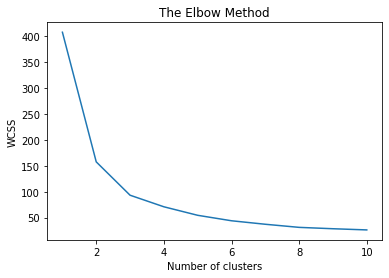

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Optimal number of cluster is 3.

### Training the K-Means model on the dataset

In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

### Visualising the clusters

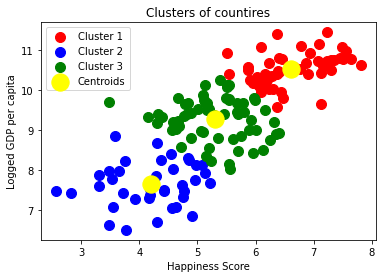

In [ ]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of countires')
plt.xlabel('Happiness Score')
plt.ylabel('Logged GDP per capita')
plt.legend()
plt.show()

From clustering of **Logged GDP per capita** and **Happinness Score** it indicate that countries with high GDP tends to have high Happinness Score

## Happinness Score and Social support

In [ ]:
X = WHR.iloc[:, [2, 4]].values

### Using the elbow method to find the optimal number of clusters

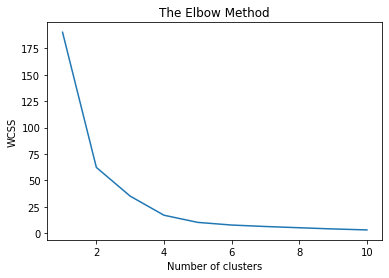

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Optimal number of cluster is 4.

### Training the K-Means model on the dataset

In [ ]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

### Visualising the clusters

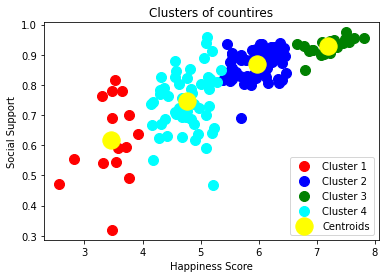

In [ ]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of countires')
plt.xlabel('Happiness Score')
plt.ylabel('Social Support')
plt.legend()
plt.show()

The plot indicates that countries with high Social support tends to have high Happinness score, but there are some countries even though with high social support have low happinness score. Therefore the relationship is not exact.

## Happinness Score and Healthy life expectancy

In [ ]:
X = WHR.iloc[:, [2, 5]].values

### Using the elbow method to find the optimal number of clusters

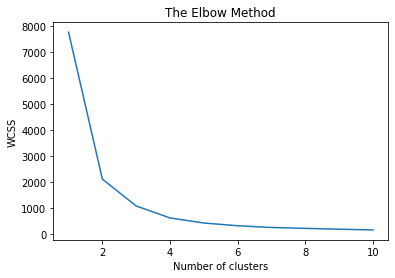

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Optimal number of cluster is 3.

### Training the K-Means model on the dataset

In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

### Visualising the clusters

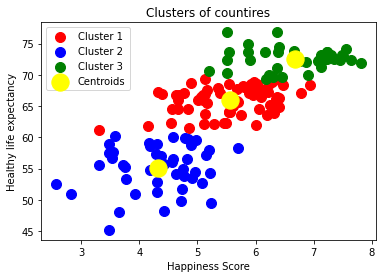

In [ ]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of countires')
plt.xlabel('Happiness Score')
plt.ylabel('Healthy life expectancy')
plt.legend()
plt.show()

The plot indicates that countries with high life expectancy tends to show high Happinness score.

## Happinness Score and Freedom to make life choices

In [ ]:
X = WHR.iloc[:, [2, 6]].values

### Using the elbow method to find the optimal number of clusters

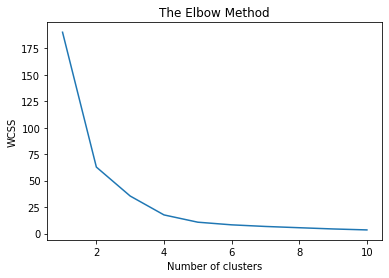

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Optimal number of cluster is 4.

### Training the K-Means model on the dataset

In [ ]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

### Visualising the clusters

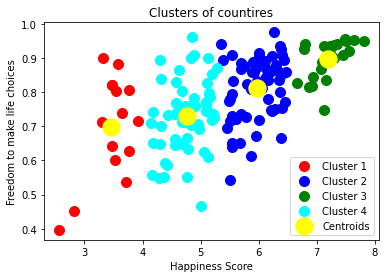

In [ ]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of countires')
plt.xlabel('Happiness Score')
plt.ylabel('Freedom to make life choices')
plt.legend()
plt.show()

The plot indicates that even with high Freedom to make life choices countires indicates high as well as low Happiness score.

## Happinness Score and Generosity

In [ ]:
X = WHR.iloc[:, [2, 7]].values

### Using the elbow method to find the optimal number of clusters

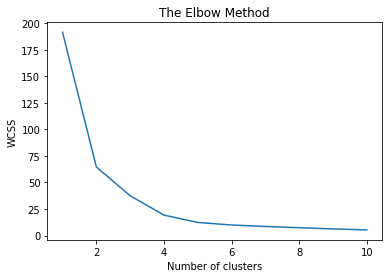

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Optimal number of cluster is 4.

### Training the K-Means model on the dataset

In [ ]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

### Visualising the clusters

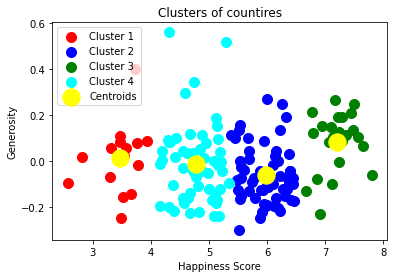

In [ ]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of countires')
plt.xlabel('Happiness Score')
plt.ylabel('Generosity')
plt.legend()
plt.show()

The plot indicates that there is a random relationship between generosity and Happiness score. As it is obeserved from the plot that even though countires with high generosity shows low happiness score and vice-versa. 

In [ ]:
WHR

,Country name,Regional indicator,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,Western Europe,7.8087,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445
1,Denmark,Western Europe,7.6456,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489
2,Switzerland,Western Europe,7.5599,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728
3,Iceland,Western Europe,7.5045,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710
4,Norway,Western Europe,7.4880,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218
...,...,...,...,...,...,...,...,...,...
148,Central African Republic,Sub-Saharan Africa,3.4759,6.625160,0.319460,45.200001,0.640881,0.082410,0.891807
149,Rwanda,Sub-Saharan Africa,3.3123,7.600104,0.540835,61.098846,0.900589,0.055484,0.183541
150,Zimbabwe,Sub-Saharan Africa,3.2992,7.865712,0.763093,55.617260,0.711458,-0.072064,0.810237
151,South Sudan,Sub-Saharan Africa,2.8166,7.425360,0.553707,51.000000,0.451314,0.016519,0.763417


## Happinness Score and Perception of Corruption

In [ ]:
X = WHR.iloc[:, [2, 8]].values

### Using the elbow method to find the optimal number of clusters

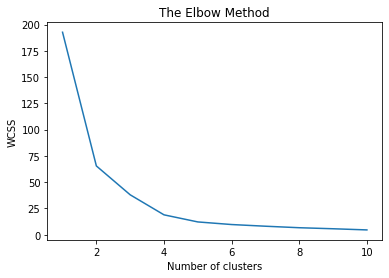

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Optimal number of cluster is 4.

### Training the K-Means model on the dataset

In [ ]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

### Visualising the clusters

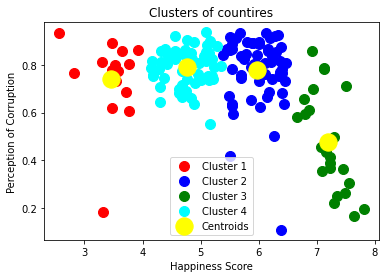

In [ ]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of countires')
plt.xlabel('Happiness Score')
plt.ylabel('Perception of Corruption')
plt.legend()
plt.show()

The plot indicates that countire with low Corruption show high happiness score. But there are still some countires which show high happiness score with high level of corruption. One more interesting observation is that most of the countries with happiness score less than 0.65 shows high level of perception of corruption.

# Predictive Modelling

# Simple Linear Regression

In [ ]:
X = WHR.iloc[:, 3:9].values
y = WHR.iloc[:, 2].values

## Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = sc_X.fit_transform(X)

## Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 0)

## Training the Simple Linear Regression model on the Training set

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Predicting the Test set results

In [ ]:
y_predLR = regressor.predict(X_test)
y_predLR
#np.set_printoptions(precision=2)
#print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

array([6.13655321, 4.57606826, 5.69781039, 5.35826695, 6.18327103,
       7.06934273, 6.03727919, 4.14933354, 4.46682933, 5.93218439,
       6.16014021, 6.07605419, 5.86804099, 3.22278177, 5.17662629,
       5.91314808, 5.43528331, 4.13192802, 5.24458549, 4.5205168 ,
       5.70828217, 6.82568947, 3.90595806])

## Calculating Loss 

In [ ]:
from sklearn.metrics import mean_squared_error

loss = mean_squared_error(y_test, y_predLR, squared=False)
print(loss)

0.4998602228581041


In [ ]:
print(np.sqrt(loss))

0.7070079369130902


The loss of the linear regression model is **0.499** which implies that the predicted values differ from actual values by **0.707**.

# Support Vector machine

## Training the SVR model on the whole dataset

In [ ]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

## Predicting the Test set results

In [ ]:
y_predSVM = regressor.predict(X_test)
y_predSVM
#np.set_printoptions(precision=2)
#print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

array([6.08783719, 4.72097653, 5.84166628, 5.37320518, 6.43107689,
       7.17126909, 5.95073801, 4.5343096 , 3.94866401, 6.05140296,
       6.39255114, 5.90898234, 4.85668491, 4.21626834, 5.06407024,
       5.96673831, 5.53735081, 4.5674473 , 5.19279304, 4.6415418 ,
       5.71484553, 7.2685465 , 4.23599628])

## Calculating Loss 

In [ ]:
from sklearn.metrics import mean_squared_error

loss = mean_squared_error(y_test, y_predSVM, squared=False)
print(loss)

0.46648512404129844


In [ ]:
print(np.sqrt(loss))

0.6829971625426408


The loss of the SVM regression model is **0.466** which implies that the predicted values differ from actual values by **0.683**.

As compared to Simple linear regression, SVM model performs better and thus the SVM model is used to predict the unknown values.

# Predicting Happiness score

In [ ]:
predict = pd.read_csv('PredictingHappiness2020.csv')

In [ ]:
predict

,Country name,Regional indicator,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Uto,Western Europe,NaN,11.450681,0.974670,76.804581,0.974998,0.560664,0.109784
1,Wea,Western Europe,NaN,10.688402,0.913134,72.863565,0.854993,0.038923,0.528730
2,Ssaa,Sub-Saharan Africa,NaN,7.425360,0.553707,51.000000,0.451314,0.016519,0.763417
3,Seaa,Southeast Asia,NaN,9.366847,0.824093,64.710476,0.912667,0.161870,0.704920
4,Saa,South Asia,NaN,8.559491,0.708996,62.448662,0.771805,0.035106,0.790656
5,Naa,North America and ANZ,NaN,10.709919,0.933842,72.177067,0.907045,0.164180,0.431717
6,Menaa,Middle East and North Africa,NaN,9.713648,0.796720,65.313611,0.710171,-0.084426,0.761510
7,Laca,Latin America and Caribbean,NaN,9.303024,0.856891,66.717328,0.830684,-0.071901,0.801526
8,Eaa,East Asia,NaN,10.316895,0.859852,71.094847,0.761027,-0.051978,0.702266
9,Cisa,Commonwealth of Independent States,NaN,9.207234,0.856729,64.726558,0.784004,-0.041285,0.746387


In [ ]:
X_pr = predict.iloc[:, 3:9].values
X_pr

array([[ 1.14506807e+01,  9.74669576e-01,  7.68045807e+01,
         9.74998116e-01,  5.60663998e-01,  1.09784193e-01],
       [ 1.06884020e+01,  9.13133996e-01,  7.28635650e+01,
         8.54993255e-01,  3.89231950e-02,  5.28729918e-01],
       [ 7.42535973e+00,  5.53707123e-01,  5.10000000e+01,
         4.51313615e-01,  1.65185480e-02,  7.63417304e-01],
       [ 9.36684746e+00,  8.24093176e-01,  6.47104759e+01,
         9.12666606e-01,  1.61869782e-01,  7.04920359e-01],
       [ 8.55949075e+00,  7.08995802e-01,  6.24486618e+01,
         7.71805439e-01,  3.51058990e-02,  7.90655741e-01],
       [ 1.07099192e+01,  9.33842316e-01,  7.21770668e+01,
         9.07045499e-01,  1.64180184e-01,  4.31716662e-01],
       [ 9.71364784e+00,  7.96719783e-01,  6.53136112e+01,
         7.10170557e-01, -8.44264780e-02,  7.61509552e-01],
       [ 9.30302361e+00,  8.56891042e-01,  6.67173284e+01,
         8.30683632e-01, -7.19012650e-02,  8.01526180e-01],
       [ 1.03168945e+01,  8.59852393e-01,  7.109

## Feature Scaling

In [ ]:
X_pr = sc_X.fit_transform(X_pr)

## Predicting the unknown set results

In [ ]:
predSVM = regressor.predict(X_pr)
predSVM
#np.set_printoptions(precision=2)
#print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

array([6.36111643, 6.73417029, 4.25281286, 5.86405376, 5.16942914,
       7.13226704, 5.33289783, 5.79021462, 6.09657696, 5.60147814,
       5.87151571, 4.04305327])

In [ ]:
submission = pd.DataFrame({
        "Country name": predict["Country name"],
        "Happiness Score": predSVM
    })

submission.to_csv('Prediction.csv', index=False)

# Impact of the Covid-19 pandemic on people's wellbeing

COVID-19 social isolation measures have had a profound impact on the psychological and mental well-being of individuals across society. Many of the anticipated consequences of isolation measures are themselves key risk factors for mental health issues including suicide, self-harm, substance misuse, and domestic and child abuse. Social interaction has been widely interlinked with psychological well-being, social opportunities and employment; thereby restriction of these measures are suggested to be profoundly distressing to those experiencing strict isolation. Previous epidemics have induced widespread fear, loneliness and psychological sequelae; COVID-19 is inducing similar effects.

The implementation of a nationwide lockdown disrupts the day-to-day lives of the general public; the pandemic has caused an unprecedented shrinkage of the world economy and the closure of businesses across the world. There have been reports of heightened feelings of anxiety and depression, with some fearful of post-lockdown anxiety and paranoia; the largest stressor being an overarching feeling of loss (loss of income, routine or social interaction). Other at-risk groups include children and students who have experienced closure of schools and/or universities causing significant disruption to daily routines, with factors such as exam postponement, accommodation expulsion and graduation cancellations contributing. Furthermore, there has been a significant detrimental impact to those suffering from ongoing mental health conditions, due to decreased access to support and resources. The COVID-19 pandemic has seen the incidence of domestic abuse dramatically increase globally because of reduced options for support, increased exposure to exploitative relationships and disaster-related instability within the household. Consequently, there has been a 32–36% increase in domestic abuse incidents in France, 21–35% increase across the USA, 25% increase in UK domestic abuse hotline calls and a 75% increase in Google searches relating to domestic abuse support. The social-distancing and sheltering-in-place measures are essential to minimising the spread of COVID-19; however, they are likely to dramatically increase the risk of domestic and inter-family violence.

The COVID-19 pandemic is having far reaching effects into the mental well-being of individuals in society. Authorities must take into account not only the economic effects of social isolation, but the mental impact on the community also, implementing appropriate measures such as expansion of the “safe spaces” model, to help those suffering mentally and the most vulnerable, preventing further detriment.

## Potenital Public Policy

Depression and anxiety symptoms were substantively elevated during the pandemic, including for individuals with no existing mental health diagnosis. Pandemic-induced impairments in work and social functioning were strongly associated with elevated depression and anxiety symptoms, as well as decreased psychological wellbeing. Financial distress due to the pandemic, was also a key correlate of poorer mental health.

These findings suggest that minimizing disruption to work and social functioning, and increasing access to mental health services in the community, are important policy goals to minimize pandemic-related impacts on mental health and wellbeing. From the above data analysis it has been concluded that GDP shows a strong association with the Happiness Score, so the government should work on innovative policies that should be focused on boosting the economy and minimizing disruption to work and social functioning.

Social Support has also shown strong association with the Happiness score, so policies with increasing access to mental health services in the community would be favorable.

Healthy life expectancy indicates strong association with the Happiness score, so policies that promotes health and fitness would be preferable. Some example is **Fit India Movement** in India to encourage people to remain healthy and fit by including physical activities and sports in their daily lives. 

# Limitations

One of the limitations was concerned with the less data avaiable. The model trained to predict the Happiness Score can be trained even better by the availability of more data.

Further limitations are often highlighted by economists and psychologists. 
Namely, while we might commonly think of happiness as the opposite of depression, this does not always appear to be the case. 
People living with mental health problems can simultaneously report feeling happy.
Some of the happiest nations, such as Finland and Denmark, also have high suicide rates, as reported in a new study, which set out to expose some of the contradictions in the Nordic dominance of global happiness league tables. 

On the other hand we can assume that happiness as the opposite of depression.